In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from matplotlib.pyplot import imshow
from torchvision import transforms
from torch.utils import data
from matplotlib import pyplot as plt
from win32gui import PtInRegion

In [106]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten()
            # nn.Linear(in_features=4 * 4 * 64, out_features=64),
            # nn.ReLU(),
            # nn.Linear(in_features=64, out_features=10),
        )
    def forward(self, x):
        return self.model(x)

In [50]:
trans = transforms.Compose([transforms.ToTensor()])
train_set = torchvision.datasets.CIFAR10(root='../data', train=True, download=False, transform=trans)
test_set = torchvision.datasets.CIFAR10(root='../data', train=False, download=False, transform=trans)
train_loader = data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = data.DataLoader(test_set, batch_size=128, shuffle=True)

In [54]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss().to(device)
learning_rate = 1e-2

In [55]:
net = CNN().to(device)
optimizer = optim.SGD(net.parameters(), lr=learning_rate)
net = net.train()

train_step = 0
train_losses = []
train_accuracies = []
eval_accuracies = []
epchos = 20
for epoch in range(epchos):
    train_loss = 0
    train_acc = 0
    eval_acc = 0
    print("第{}轮训练开始".format(epoch+1))
    for imgs,labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = net(imgs)
        loss_fn =criterion(outputs, labels)
        optimizer.zero_grad()
        loss_fn.backward()
        optimizer.step()

        train_step += 1
        train_loss += loss_fn.item()
        _, pred = torch.max(outputs, 1)
        num_correct = (pred == labels).sum().item()
        acc = num_correct / len(labels)
        train_acc += num_correct
        if train_step % 200 == 0:
            print('[INFO] Epoch-{}-Batch-{}: Train:Loss-{:.4f},Accuracy-{:.4f}'.format(epoch + 1,train_step,loss_fn.item(),acc))
    train_losses.append(train_loss/len(train_loader))
    train_accuracies.append(train_acc/len(train_set))
    net = net.eval()
    with torch.no_grad():
        for imgs,labels in test_loader:
            imgs = imgs.to(device)
            labels = labels.to(device)
            outputs = net(imgs)
            _, pred = torch.max(outputs, 1)
            num_correct = (pred == labels).sum().item()
            eval_acc += num_correct
    eval_accuracies.append(eval_acc/len(test_set))
    print('[INFO] Epoch-{}: Train: Loss-{:.4f}, Accuracy-{:.4f} | Test: Accuracy-{:.4f}'.format(epoch + 1, train_loss/len(train_set), train_acc / len(train_set),eval_acc / len(test_set)))
    print(eval_acc)

第1轮训练开始
[INFO] Epoch-1-Batch-200: Train:Loss-2.2957,Accuracy-0.0781
[INFO] Epoch-1-Batch-400: Train:Loss-2.2619,Accuracy-0.1562
[INFO] Epoch-1-Batch-600: Train:Loss-2.1954,Accuracy-0.2500
[INFO] Epoch-1: Train: Loss-0.0349, Accuracy-0.1548 | Test: Accuracy-0.2541
2541
第2轮训练开始
[INFO] Epoch-2-Batch-800: Train:Loss-2.0744,Accuracy-0.1719
[INFO] Epoch-2-Batch-1000: Train:Loss-2.0539,Accuracy-0.2344
[INFO] Epoch-2-Batch-1200: Train:Loss-1.8643,Accuracy-0.3281
[INFO] Epoch-2-Batch-1400: Train:Loss-1.8434,Accuracy-0.3594
[INFO] Epoch-2: Train: Loss-0.0297, Accuracy-0.3193 | Test: Accuracy-0.3469
3469
第3轮训练开始
[INFO] Epoch-3-Batch-1600: Train:Loss-1.8575,Accuracy-0.3125
[INFO] Epoch-3-Batch-1800: Train:Loss-1.7415,Accuracy-0.4062
[INFO] Epoch-3-Batch-2000: Train:Loss-1.7641,Accuracy-0.4375
[INFO] Epoch-3-Batch-2200: Train:Loss-1.5750,Accuracy-0.2969
[INFO] Epoch-3: Train: Loss-0.0262, Accuracy-0.3995 | Test: Accuracy-0.4212
4212
第4轮训练开始
[INFO] Epoch-4-Batch-2400: Train:Loss-1.7044,Accuracy-0.37

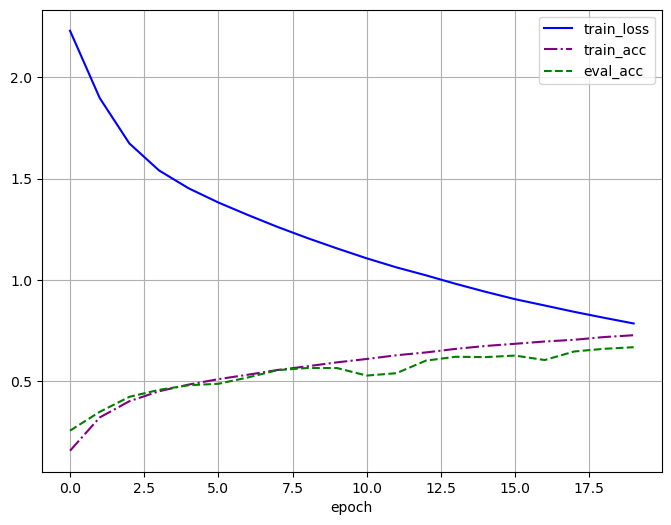

In [58]:
def chart_cifar10(epchos,train_losses, train_accuracies, eval_accuracies):
    import matplotlib.pyplot as plt
    epochs = list(range(1,epchos + 1))
    plt.figure(figsize=(8, 6))
    plt.plot( train_losses, label='train_loss', color='blue')
    plt.plot( train_accuracies, label='train_acc', linestyle='-.', color='purple')
    plt.plot( eval_accuracies, label='eval_acc', linestyle='--', color='green')
    plt.xlabel('epoch')
    plt.legend()
    # 显示网格
    plt.grid(True)
    # 显示图形
    plt.show()
chart_cifar10(epchos,train_losses,train_accuracies,eval_accuracies)